# Student Score Prediction - Polynomial Regression Analysis

## Step 1: Import Required Libraries

## Step 1: Import Required Libraries

In [56]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


## Step 2: Load and Explore the Data

In [58]:
# Load the dataset
df = pd.read_csv('../data/Students Performance .csv')

# Display basic information
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nFirst few rows:")
df.head(10)

Dataset shape: (145, 16)

Columns: ['Student_ID', 'Student_Age', 'Sex', 'High_School_Type', 'Scholarship', 'Additional_Work', 'Sports_activity', 'Transportation', 'Weekly_Study_Hours', 'Attendance', 'Reading', 'Notes', 'Listening_in_Class', 'Project_work', 'Grade', 'Target_Score']

First few rows:


,Student_ID,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,Target_Score
0,STUDENT1,19-22,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA,51.9
1,STUDENT2,19-22,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA,65.3
2,STUDENT3,19-22,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA,58.8
3,STUDENT4,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA,46.1
4,STUDENT5,19-22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA,100.0
5,STUDENT6,19-22,Male,State,50%,No,No,Private,2,Always,Yes,No,Yes,Yes,BA,68.7
6,STUDENT7,18,Male,State,75%,No,No,Private,0,Always,No,Yes,Yes,Yes,CC,53.6
7,STUDENT8,18,Female,State,50%,Yes,Yes,Bus,2,Sometimes,No,Yes,Yes,Yes,BA,73.6
8,STUDENT9,19-22,Female,Other,50%,No,Yes,Bus,0,Always,No,No,No,Yes,CC,44.5
9,STUDENT10,19-22,Female,State,50%,No,No,Bus,12,Never,No,Yes,No,No,Fail,89.0


## Step 3: Exploratory Data Analysis (EDA)

In [59]:
# Check data types and missing values
print("Data Types and Missing Values:")
print("=" * 50)
info_df = pd.DataFrame({
    'Data Type': df.dtypes,
    'Missing Values': df.isnull().sum(),
    'Unique Values': df.nunique()
})
print(info_df)

# Check for any missing scholarship values
print(f"\nScholarship missing values: {df['Scholarship'].isnull().sum()}")

Data Types and Missing Values:
                   Data Type  Missing Values  Unique Values
Student_ID            object               0            145
Student_Age           object               0              3
Sex                   object               0              2
High_School_Type      object               0              3
Scholarship           object               0              5
Additional_Work       object               0              2
Sports_activity       object               0              2
Transportation        object               0              2
Weekly_Study_Hours     int64               0              4
Attendance            object               0              4
Reading               object               0              2
Notes                 object               0              3
Listening_in_Class    object               0              3
Project_work          object               0              2
Grade                 object               0              8
Target_Sc

,Weekly_Study_Hours,Target_Score
count,145.000000,145.000000
mean,2.331034,61.511724
std,4.249273,16.335074
min,0.000000,36.000000
25%,0.000000,49.700000
50%,0.000000,58.000000
75%,2.000000,67.200000
max,12.000000,100.000000


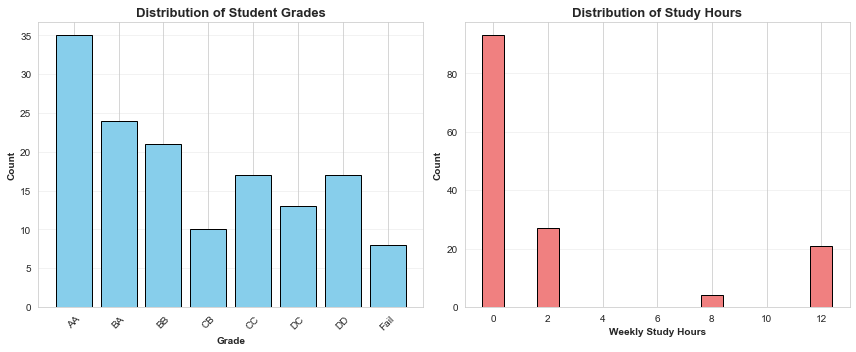


Grade Distribution:
Grade
AA      35
BA      24
BB      21
CB      10
CC      17
DC      13
DD      17
Fail     8
Name: count, dtype: int64


In [41]:
# Visualize Grade Distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
grade_counts = df['Grade'].value_counts().sort_index()
plt.bar(grade_counts.index, grade_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Grade', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Distribution of Student Grades', fontweight='bold', fontsize=13)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')

plt.subplot(1, 2, 2)
study_hours_dist = df['Weekly_Study_Hours'].value_counts().sort_index()
plt.bar(study_hours_dist.index, study_hours_dist.values, color='lightcoral', edgecolor='black')
plt.xlabel('Weekly Study Hours', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Distribution of Study Hours', fontweight='bold', fontsize=13)
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nGrade Distribution:")
print(grade_counts)

## Step 4: Use Target Variable from CSV

The CSV already contains `Target_Score` with quadratic characteristics (created by create_target_variable.py).
This target has both linear and quadratic components, making it perfect for comparing degree 1 vs degree 2 models.

✓ Using Target_Score from CSV

💡 Target has QUADRATIC characteristics:
   • Linear component for basic trends
   • Quadratic component (squared terms & interactions)
   • Polynomial degree 2 should outperform degree 1!

Score statistics:
count    145.000000
mean      61.511724
std       16.335074
min       36.000000
25%       49.700000
50%       58.000000
75%       67.200000
max      100.000000
Name: Score, dtype: float64


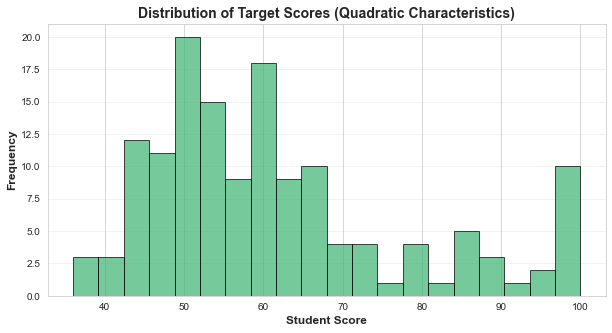

In [42]:
# Use Target_Score from CSV (already has quadratic characteristics)
if 'Target_Score' not in df.columns:
    raise ValueError("Target_Score column not found! Run create_target_variable.py first.")

df['Score'] = df['Target_Score']

# Handle missing values in Scholarship
df['Scholarship'] = df['Scholarship'].fillna('0%')

print("✓ Using Target_Score from CSV")
print("\n💡 Target has QUADRATIC characteristics:")
print("   • Linear component for basic trends")
print("   • Quadratic component (squared terms & interactions)")
print("   • Polynomial degree 2 should outperform degree 1!")

print(f"\nScore statistics:")
print(df['Score'].describe())

# Visualize score distribution
plt.figure(figsize=(10, 5))
plt.hist(df['Score'], bins=20, color='mediumseagreen', edgecolor='black', alpha=0.7)
plt.xlabel('Student Score', fontweight='bold', fontsize=12)
plt.ylabel('Frequency', fontweight='bold', fontsize=12)
plt.title('Distribution of Target Scores (Quadratic Characteristics)', fontweight='bold', fontsize=14)
plt.grid(True, alpha=0.3, axis='y')
plt.show()

In [43]:
df.head()

,Student_ID,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,Target_Score,Score
0,STUDENT1,19-22,Male,Other,50%,Yes,No,Private,0,Always,Yes,Yes,No,No,AA,51.9,51.9
1,STUDENT2,19-22,Male,Other,50%,Yes,No,Private,0,Always,Yes,No,Yes,Yes,AA,65.3,65.3
2,STUDENT3,19-22,Male,State,50%,No,No,Private,2,Never,No,No,No,Yes,AA,58.8,58.8
3,STUDENT4,18,Female,Private,50%,Yes,No,Bus,2,Always,No,Yes,No,No,AA,46.1,46.1
4,STUDENT5,19-22,Male,Private,50%,No,No,Bus,12,Always,Yes,No,Yes,Yes,AA,100.0,100.0


## Step 5: Data Preprocessing

In [44]:
# Encode categorical variables
categorical_cols = ['Sex', 'High_School_Type', 'Scholarship', 'Additional_Work', 
                   'Sports_activity', 'Transportation', 'Reading', 'Notes', 
                   'Listening_in_Class', 'Project_work', 'Attendance']

label_encoders = {}
for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le

# Convert age ranges to numerical
age_mapping = {'18': 18, '19-22': 20.5, '23-27': 25}
df['Student_Age'] = df['Student_Age'].map(age_mapping)

print("✓ Categorical variables encoded successfully")

✓ Categorical variables encoded successfully


In [45]:
df.head()

,Student_ID,Student_Age,Sex,High_School_Type,Scholarship,Additional_Work,Sports_activity,Transportation,Weekly_Study_Hours,Attendance,Reading,Notes,Listening_in_Class,Project_work,Grade,Target_Score,Score
0,STUDENT1,20.5,1,0,3,1,0,1,0,1,1,2,1,0,AA,51.9,51.9
1,STUDENT2,20.5,1,0,3,1,0,1,0,1,1,1,2,1,AA,65.3,65.3
2,STUDENT3,20.5,1,2,3,0,0,1,2,2,0,1,1,1,AA,58.8,58.8
3,STUDENT4,18.0,0,1,3,1,0,0,2,1,0,2,1,0,AA,46.1,46.1
4,STUDENT5,20.5,1,1,3,0,0,0,12,1,1,1,2,1,AA,100.0,100.0


## Step 6: Feature Selection and Correlation Analysis

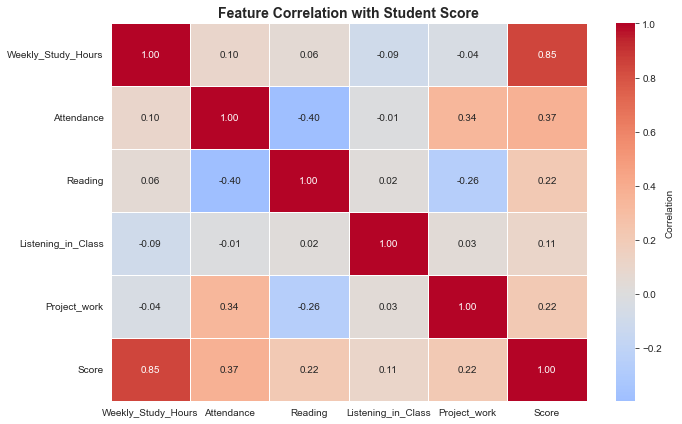


Correlation with Score (sorted):
Score                 1.000000
Weekly_Study_Hours    0.845877
Attendance            0.370983
Project_work          0.220693
Reading               0.218091
Listening_in_Class    0.107116
Name: Score, dtype: float64


In [46]:
# Select features for regression
feature_cols = ['Weekly_Study_Hours', 'Attendance', 'Reading', 
               'Listening_in_Class', 'Project_work']

# Calculate correlations
corr_data = df[feature_cols + ['Score']].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', center=0, fmt='.2f', 
            linewidths=1, cbar_kws={'label': 'Correlation'})
plt.title('Feature Correlation with Student Score', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

print("\nCorrelation with Score (sorted):")
print(corr_data['Score'].sort_values(ascending=False))

## Step 7: Split Data into Training and Testing Sets

In [47]:
# Prepare features and target
X = df[feature_cols]
y = df['Score']

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")
print(f"Features: {X.shape[1]}")

Training set: 116 samples
Test set: 29 samples
Features: 5


## Step 8: Train Linear Regression Model (Degree 1)

In [48]:
# Train Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_train_pred_linear = linear_model.predict(X_train)
y_test_pred_linear = linear_model.predict(X_test)

# Calculate metrics
train_r2_linear = r2_score(y_train, y_train_pred_linear)
test_r2_linear = r2_score(y_test, y_test_pred_linear)
test_rmse_linear = np.sqrt(mean_squared_error(y_test, y_test_pred_linear))
test_mae_linear = mean_absolute_error(y_test, y_test_pred_linear)

print("=" * 60)
print("LINEAR REGRESSION (Degree 1) Results")
print("=" * 60)
print(f"Training R² Score: {train_r2_linear:.4f}")
print(f"Test R² Score: {test_r2_linear:.4f}")
print(f"Test RMSE: {test_rmse_linear:.2f}")
print(f"Test MAE: {test_mae_linear:.2f}")

LINEAR REGRESSION (Degree 1) Results
Training R² Score: 0.9698
Test R² Score: 0.9692
Test RMSE: 2.83
Test MAE: 2.24


## Step 9: Train Polynomial Regression Model (Degree 2)

In [49]:
# Create Polynomial Pipeline (Degree 2)
poly_model_2 = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Train model
poly_model_2.fit(X_train, y_train)

# Make predictions
y_train_pred_poly2 = poly_model_2.predict(X_train)
y_test_pred_poly2 = poly_model_2.predict(X_test)

# Calculate metrics
train_r2_poly2 = r2_score(y_train, y_train_pred_poly2)
test_r2_poly2 = r2_score(y_test, y_test_pred_poly2)
test_rmse_poly2 = np.sqrt(mean_squared_error(y_test, y_test_pred_poly2))
test_mae_poly2 = mean_absolute_error(y_test, y_test_pred_poly2)

print("=" * 60)
print("POLYNOMIAL REGRESSION (Degree 2) Results")
print("=" * 60)
print(f"Training R² Score: {train_r2_poly2:.4f}")
print(f"Test R² Score: {test_r2_poly2:.4f}")
print(f"Test RMSE: {test_rmse_poly2:.2f}")
print(f"Test MAE: {test_mae_poly2:.2f}")

POLYNOMIAL REGRESSION (Degree 2) Results
Training R² Score: 0.9792
Test R² Score: 0.9791
Test RMSE: 2.33
Test MAE: 1.83


## Step 10: Compare Model Performance

In [50]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': ['Linear (d=1)', 'Polynomial (d=2)'],
    'R² Score': [test_r2_linear, test_r2_poly2],
    'RMSE': [test_rmse_linear, test_rmse_poly2],
    'MAE': [test_mae_linear, test_mae_poly2]
})

print("\n" + "=" * 60)
print("MODEL COMPARISON SUMMARY")
print("=" * 60)
print(comparison_df.to_string(index=False))
print("\n🏆 Best Model:", comparison_df.loc[comparison_df['R² Score'].idxmax(), 'Model'])


MODEL COMPARISON SUMMARY
           Model  R² Score     RMSE      MAE
    Linear (d=1)  0.969198 2.826462 2.237061
Polynomial (d=2)  0.979080 2.329343 1.831890

🏆 Best Model: Polynomial (d=2)


## Step 11: Visualize Model Comparison

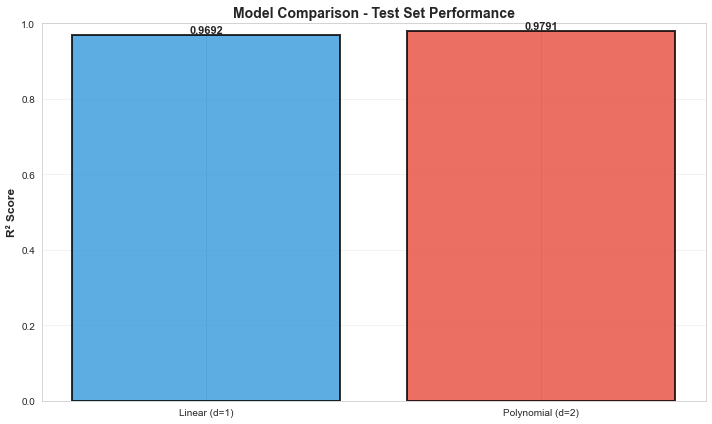

In [51]:
# Plot R² Score comparison
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(comparison_df['Model'], comparison_df['R² Score'], 
              color=['#3498db', '#e74c3c'], alpha=0.8, edgecolor='black', linewidth=2)

ax.set_ylabel('R² Score', fontsize=12, fontweight='bold')
ax.set_title('Model Comparison - Test Set Performance', fontsize=14, fontweight='bold')
ax.set_ylim(0, 1.0)
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

## Step 12: Visualize Polynomial Fitting with Smooth Curves

In [52]:
# Use primary feature (Study Hours) for visualization
feature_idx = 0
X_primary = X_test.iloc[:, feature_idx].values

# Sort for plotting
sort_idx = np.argsort(X_primary)
X_sorted = X_primary[sort_idx]
y_test_array = y_test.values if hasattr(y_test, 'values') else y_test
y_sorted = y_test_array[sort_idx]

# Create smooth curves (300 points)
X_range = np.linspace(X_sorted.min(), X_sorted.max(), 300)

# Create full feature arrays with mean values for other features
X_smooth = pd.DataFrame(
    np.tile(X_test.mean().values, (300, 1)),
    columns=X_test.columns
)
X_smooth.iloc[:, feature_idx] = X_range

# Get smooth predictions
y_smooth_linear = linear_model.predict(X_smooth)
y_smooth_poly2 = poly_model_2.predict(X_smooth)

print("✓ Smooth curves generated for visualization")

✓ Smooth curves generated for visualization


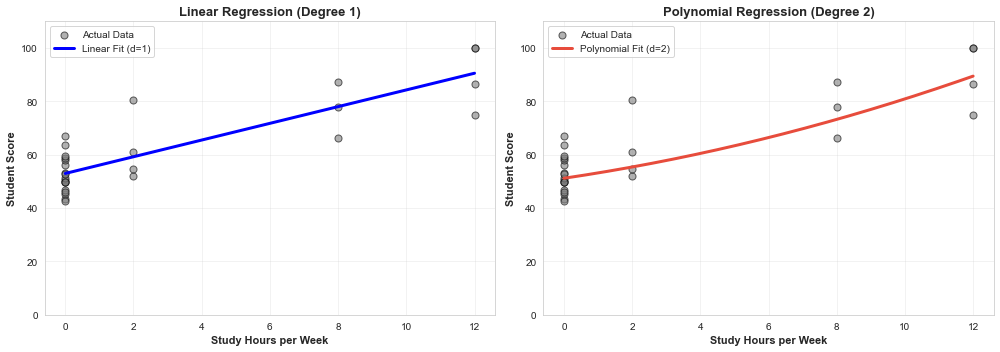

In [53]:
# Create side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Linear (Degree 1)
axes[0].scatter(X_sorted, y_sorted, alpha=0.6, s=50, c='gray', edgecolors='k', label='Actual Data')
axes[0].plot(X_range, y_smooth_linear, 'b-', linewidth=3, label='Linear Fit (d=1)')
axes[0].set_xlabel('Study Hours per Week', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Student Score', fontsize=11, fontweight='bold')
axes[0].set_title('Linear Regression (Degree 1)', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim([0, 110])

# Plot 2: Polynomial Degree 2
axes[1].scatter(X_sorted, y_sorted, alpha=0.6, s=50, c='gray', edgecolors='k', label='Actual Data')
axes[1].plot(X_range, y_smooth_poly2, '-', linewidth=3, label='Polynomial Fit (d=2)', color='#e74c3c')
axes[1].set_xlabel('Study Hours per Week', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Student Score', fontsize=11, fontweight='bold')
axes[1].set_title('Polynomial Regression (Degree 2)', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_ylim([0, 110])

plt.tight_layout()
plt.show()

## Step 13: Combined Comparison - Both Fits Together

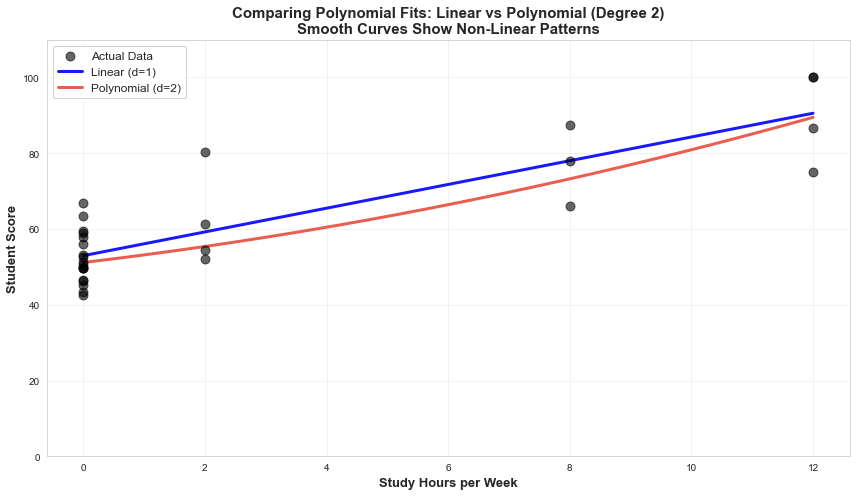


✅ Visualization complete!

Key Observations:
• Linear (d=1): Simple straight line
• Polynomial (d=2): Curved fit captures non-linear relationships


In [54]:
# Create combined plot
fig, ax = plt.subplots(figsize=(12, 7))

# Plot actual data
ax.scatter(X_sorted, y_sorted, alpha=0.6, s=80, c='black', edgecolors='k', 
          label='Actual Data', zorder=5)

# Plot smooth curves for both models
ax.plot(X_range, y_smooth_linear, 'b-', linewidth=3, label='Linear (d=1)', alpha=0.9)
ax.plot(X_range, y_smooth_poly2, '-', linewidth=3, label='Polynomial (d=2)', 
       alpha=0.9, color='#e74c3c')

ax.set_xlabel('Study Hours per Week', fontsize=13, fontweight='bold')
ax.set_ylabel('Student Score', fontsize=13, fontweight='bold')
ax.set_title('Comparing Polynomial Fits: Linear vs Polynomial (Degree 2)\nSmooth Curves Show Non-Linear Patterns', 
            fontsize=15, fontweight='bold')
ax.legend(fontsize=12, loc='best', framealpha=0.9)
ax.grid(True, alpha=0.3)
ax.set_ylim([0, 110])

plt.tight_layout()
plt.show()

print("\n✅ Visualization complete!")
print("\nKey Observations:")
print("• Linear (d=1): Simple straight line")
print("• Polynomial (d=2): Curved fit captures non-linear relationships")

## Step 14: Residual Analysis

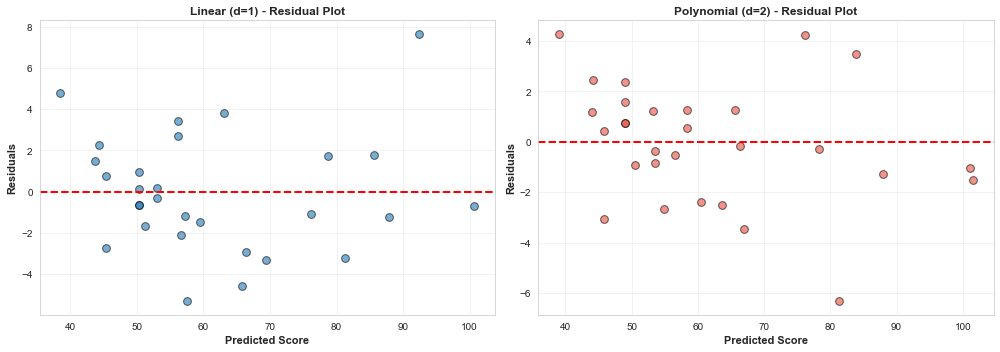


Residual plots help identify model fit quality:
• Random scatter around zero = Good fit
• Patterns in residuals = Model not capturing all relationships


In [55]:
# Create residual plots for both models
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Linear model residuals
residuals_linear = y_test - y_test_pred_linear
axes[0].scatter(y_test_pred_linear, residuals_linear, alpha=0.6, edgecolors='k', s=60)
axes[0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0].set_xlabel('Predicted Score', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Residuals', fontsize=11, fontweight='bold')
axes[0].set_title('Linear (d=1) - Residual Plot', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Polynomial degree 2 residuals
residuals_poly2 = y_test - y_test_pred_poly2
axes[1].scatter(y_test_pred_poly2, residuals_poly2, alpha=0.6, edgecolors='k', s=60, color='#e74c3c')
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Score', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Residuals', fontsize=11, fontweight='bold')
axes[1].set_title('Polynomial (d=2) - Residual Plot', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nResidual plots help identify model fit quality:")
print("• Random scatter around zero = Good fit")
print("• Patterns in residuals = Model not capturing all relationships")

## Summary

### What We Learned:

1. **Exploratory Data Analysis (EDA)**:
   - Examined data distribution and missing values
   - Analyzed feature correlations with target variable
   - Visualized grade and score distributions

2. **Linear Regression (Degree 1)**:
   - Simple straight-line fit
   - Cannot capture non-linear relationships
   - Fast and interpretable

3. **Polynomial Regression (Degree 2)**:
   - Captures quadratic (curved) patterns
   - Better for data with non-linear relationships
   - More flexible than linear regression

### Key Metrics:
- **R² Score**: How well the model explains variance (0-1, higher is better)
- **RMSE**: Root Mean Squared Error (lower is better)
- **MAE**: Mean Absolute Error (lower is better)

### Best Practices:
- Always start with EDA to understand your data
- Begin with simple models (linear)
- Add complexity only if it improves performance
- Use residual plots to validate model assumptions
- Watch for overfitting (high training R², low test R²)